In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Since the image is JPG file we need to Normalize the image
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.shape)
print(x_test.shape) 

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28)
(10000, 28, 28)


In [4]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', name='L2'),
    tf.keras.layers.Dense(10, activation='linear', name='L3')  
])

# Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)


C:\Users\hello\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Train the model
model.fit(x_train, y_train, epochs=10)

# Make predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 14ms/step - accuracy: 0.8787 - loss: 0.4237
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9643 - loss: 0.1212
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - accuracy: 0.9765 - loss: 0.0819
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9824 - loss: 0.0587
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - accuracy: 0.9867 - loss: 0.0436
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9901 - loss: 0.0331
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9919 - loss: 0.0262
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.9940 - loss: 0.0197
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9950 - loss: 0.0166
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9954 - loss: 0.0150
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9742 - loss: 0.0984
Test accuracy: 0.9772999882698059


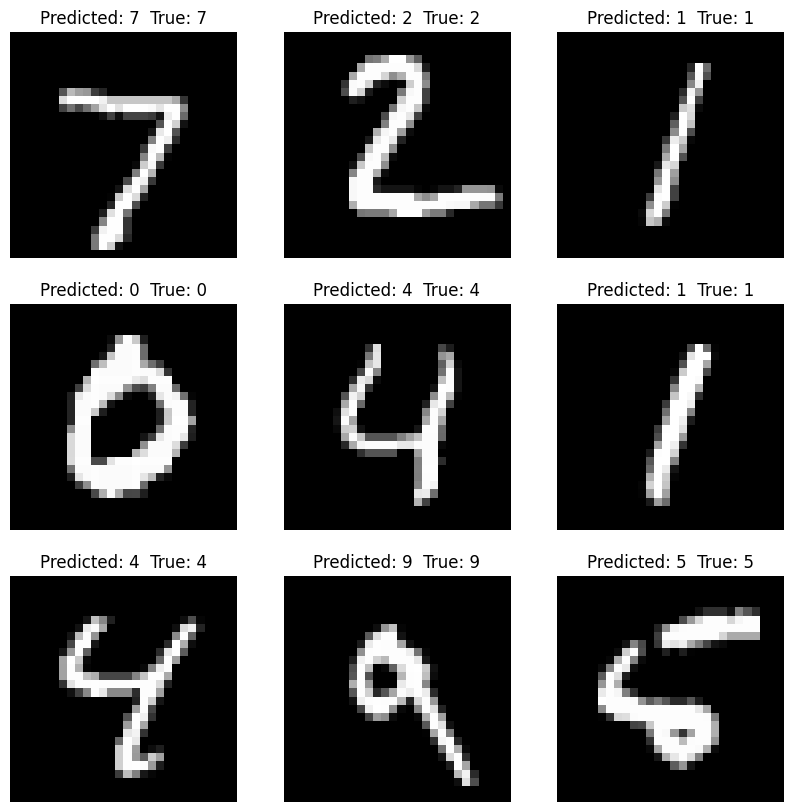

In [7]:
# Display  predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}  True: {y_test[i]}")
    plt.axis('off')
plt.show()